<a href="https://colab.research.google.com/github/sarmi2325/EconoCast/blob/main/Multivariant_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [211]:
import yfinance as yf
import pandas as pd

# Download data
df = yf.download("TSLA", start="2017-01-01", end="2024-12-31")
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]
df.dropna(inplace=True)
df.head()


[*********************100%***********************]  1 of 1 completed


Price,Open,High,Low,Close,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2017-01-03,14.324000,14.688667,14.064000,14.466000,88849500
2017-01-04,14.316667,15.200000,14.287333,15.132667,168202500
2017-01-05,15.094667,15.165333,14.796667,15.116667,88675500
2017-01-06,15.128667,15.354000,15.030000,15.267333,82918500
2017-01-09,15.264667,15.461333,15.200000,15.418667,59692500


In [212]:
df.shape

(2011, 5)

In [213]:
#check the index
df.index

DatetimeIndex(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-17',
               ...
               '2024-12-16', '2024-12-17', '2024-12-18', '2024-12-19',
               '2024-12-20', '2024-12-23', '2024-12-24', '2024-12-26',
               '2024-12-27', '2024-12-30'],
              dtype='datetime64[ns]', name='Date', length=2011, freq=None)

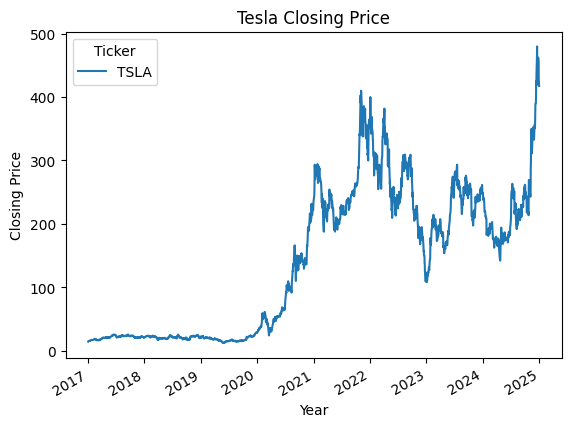

In [214]:
#plotting closing price trends over years
import matplotlib.pyplot as plt
df['Close'].plot(xlabel='Year',ylabel='Closing Price',title='Tesla Closing Price')
plt.show()

In [215]:
#checking the average of each month of last year
df.loc['2024'].resample('ME').mean()

Price,Open,High,Low,Close,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2024-01-31,217.457145,220.442856,213.241904,216.130476,1.116088e+08
2024-02-29,191.735999,195.604501,188.311499,192.793001,1.009954e+08
2024-03-31,177.000002,180.102499,173.108500,176.163000,9.494521e+07
2024-04-30,165.411364,169.204091,162.154089,165.872272,1.126609e+08
2024-05-31,177.504091,180.495909,174.195908,177.231819,7.582640e+07
2024-06-30,181.914210,185.694737,178.811053,182.220000,7.405459e+07
2024-07-31,239.729544,247.027273,234.362272,240.621364,1.339143e+08
2024-08-31,209.370911,214.086819,204.095000,209.010911,7.356241e+07


In [217]:
# 20-day Moving Average( Simple Moving Average (SMA))
df['MA20'] = df['Close'].rolling(window=20).mean() #NAN for first 20 values
#why 20? - because approximately, 20 is considered one month
delta = df['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(14).mean()
rs = gain / loss
df['RSI'] = 100 - (100 / (1 + rs))
df.dropna(inplace=True)
df.tail()

Price,Open,High,Low,Close,Volume,MA20,RSI
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,,
Date,,,,,,,
2024-12-23,431.000000,434.510010,415.410004,430.600006,72698100,396.037001,68.841618
2024-12-24,435.899994,462.779999,435.140015,462.279999,59551800,402.221501,72.174769
2024-12-26,465.160004,465.329987,451.019989,454.130005,76366400,408.016501,68.250827
2024-12-27,449.519989,450.000000,426.500000,431.660004,82666800,412.955000,59.044415
2024-12-30,419.399994,427.000000,415.750000,417.410004,64941000,416.567500,55.561821


In [218]:
df.shape

(1992, 7)

In [219]:
df.isnull().sum()

,,0
Price,Ticker,
Open,TSLA,0
High,TSLA,0
Low,TSLA,0
Close,TSLA,0
Volume,TSLA,0
MA20,,0
RSI,,0


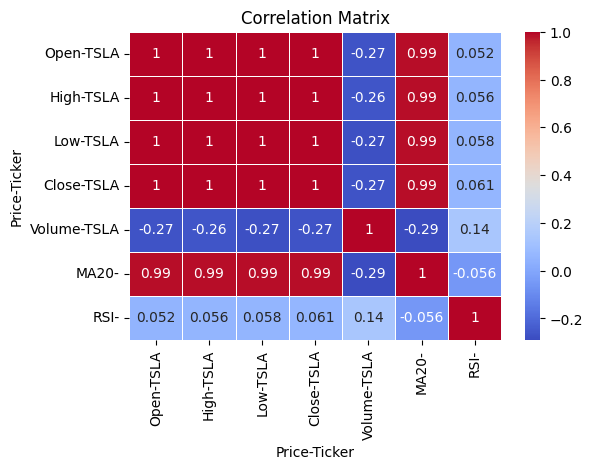

In [231]:
import seaborn as sns

correlation=df.corr()
plt.figure(figsize=(6,4))
plt.title('Correlation Matrix')
sns.heatmap(correlation,annot=True,cmap='coolwarm', linewidths=0.5)
plt.show()

In [220]:
from sklearn.preprocessing import MinMaxScaler
#normalize data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)


In [221]:
import numpy as np
#fixing the window size of 60
def create_sequences(data, target_col_index, window=60):
    X, y = [], []
    for i in range(window, len(data)):
        X.append(data[i-window:i])
        y.append(data[i, target_col_index])
    return np.array(X), np.array(y)

target_col = 'Close'
target_index = df.columns.get_loc(target_col)

X, y = create_sequences(scaled_data, target_index)


In [222]:
#spliting the data into train and test
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [223]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
#initializing the sequential api for lstm model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
history=model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - loss: 0.0130 - val_loss: 0.0029
Epoch 2/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - loss: 0.0030 - val_loss: 0.0025
Epoch 3/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 124ms/step - loss: 0.0030 - val_loss: 0.0022
Epoch 4/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 9s 95ms/step - loss: 0.0030 - val_loss: 0.0034
Epoch 5/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 6/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/step - loss: 0.0022 - val_loss: 0.0017
Epoch 7/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - loss: 0.0023 - val_loss: 0.0016
Epoch 8/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - loss: 0.0021 - val_loss: 0.0015
Epoch 9/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 10/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - loss: 0.0019 - val_loss: 0.0015
Epoch 11/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - loss: 0.0021 - val_loss: 0.0022
Epoch 12/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - loss: 0.00

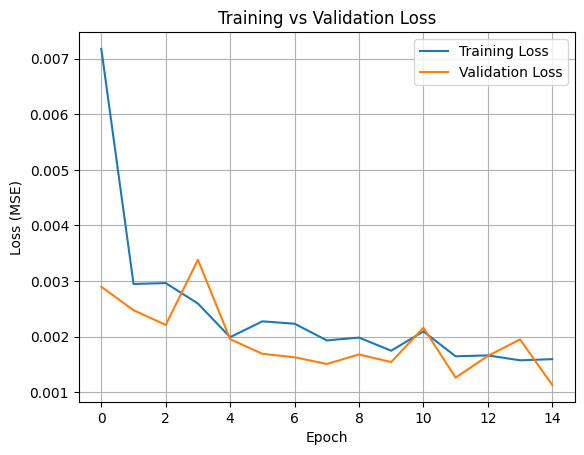

In [229]:
#plotting the training loss vs the validation loss

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

In [225]:
# Predict on test set
y_pred_scaled = model.predict(X_test)

n_features = scaled_data.shape[1]
target_index = df.columns.get_loc('Close')

# Create dummy arrays for inverse scaling
# Create dummy arrays
y_pred_full = np.zeros((len(y_pred_scaled), n_features))
y_test_full = np.zeros((len(y_test), n_features))

# Assign values safely
y_pred_full[:, target_index] = y_pred_scaled[:, 0].reshape(-1, 1) # Reshape to (488, 1)
y_test_full[:, target_index] = y_test.reshape(-1, 1) # Reshape to (488, 1)
# Inverse transform
y_pred_actual = scaler.inverse_transform(y_pred_full)[:, target_index]
y_test_actual = scaler.inverse_transform(y_test_full)[:, target_index]

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step


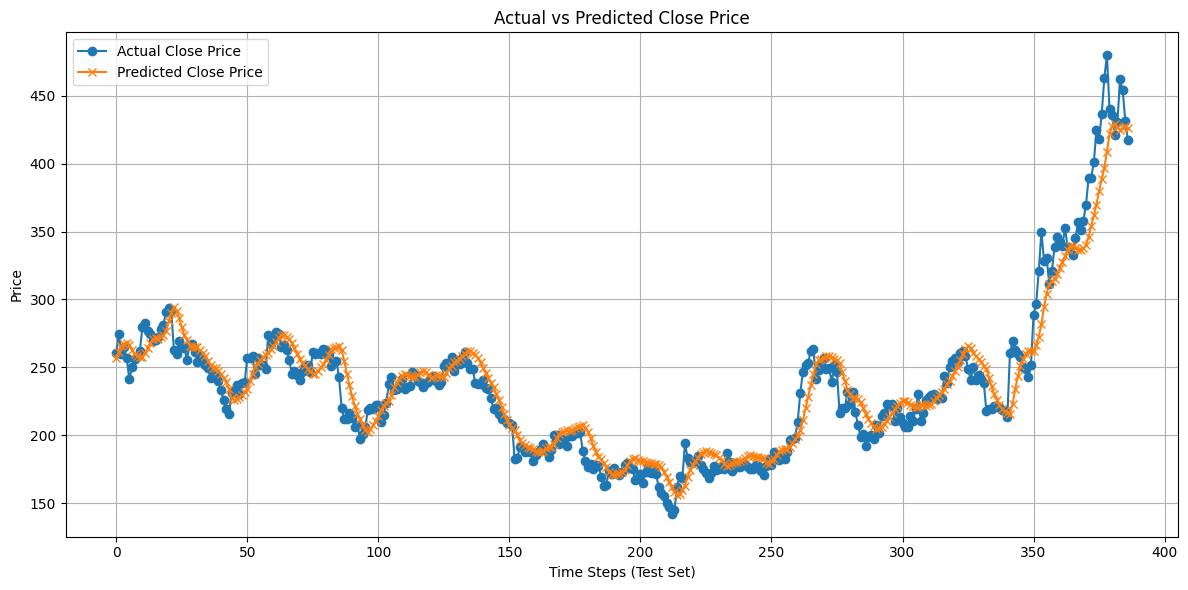

In [226]:
#plotting actual and the predicted close price
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual Close Price', marker='o')
plt.plot(y_pred_actual, label='Predicted Close Price', marker='x')
plt.title('Actual vs Predicted Close Price')
plt.xlabel('Time Steps (Test Set)')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [227]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
#calculating the mean absolute error and Root mean square error
mae = mean_absolute_error(y_test_actual, y_pred_actual)
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))

print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")


MAE: 11.47, RMSE: 15.76


In [230]:
#save and download model
model.save('EconoCast_V2.keras')
from google.colab import files
files.download('EconoCast_V2.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>